## Logic Based FizzBuzz Function [Software 1.0]

In [73]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [74]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    # We have a number of data entries which must be fed to machine for training the model so that it can predict
    # unseen data as correctly as possible. To hold muliple data entries we are using list.
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    # Just like human, machine must be fed enough data to formulate an understanding. In case of human child, only
    # after seeing a fruit multiple times, they can recognize the fruit. Same is true for a machine, a model must be
    # supplied multiple data points(i.e. pictures of fruit) to draw conclusion. This is what we call training.
    
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    # Pandas Dataframe is a n-dimentional datastructure, an in-memory data storage tool. 
    # This allows user to do rapid calculations over large amounts of data very quickly.
    # Below example demonstrated an important feature in pandas, that all the data columns are labeled. So we do not
    # need to access them by index. This is important, when the data set and dimention is large.
    
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [75]:
def processData(dataset):
    
    # Why do we have to process?
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [76]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [77]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [78]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 256
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    # -> In abstruct sense, a model tries to imitate human nervous system. It tries to emulate the way human
    # understand it's surrounding. It takes information given to it, processes it, tries to add layers of
    # understanding with time and come up with more accurate prediction system.
    
    # Why use Dense layer and then activation?
    # -> A dense layer is just a regular layer of neurons in a neural network. 
    # Each neuron recieves input from all the neurons in the previous layer, thus densely connected.
    # -> Activation is used to add non-linearity in the neural network. If we do not add activation after every
    # dense layer, then multiple dense practically becomes one single layer of complex linear function.
    
    # Why use sequential model with layers?
    # -> The sequential API allows users to create models layer-by-layer for most problems. It is limited in that,
    # it does not allow us create models that share layers or have multiple inputs or outputs. In this model, one
    # layer uses the previous layer's output as input and it's output feeds next layer only. This is great model for
    # comparatively less complex problems.
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    # -> Dropout is a regularization technique, which aims to reduce the complexity of the model with the goal to 
    # prevent overfitting. The key idea is to randomly drop units (along with their connections) from the neural 
    # network during training. This prevents units from co-adapting too much. Another side effect is that 
    # training will be faster.

        
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    # -> Softmax activation is basically the normalized exponential probability of class observations 
    # represented as neuron activations. The softmax function is often used in the final layer of a neural 
    # network-based classifier. It is uded because of the ease of differentiation and being in the range 0-1. 
    # The output of the function is also between 0 and 1 and therefore naturally a suitable choice for 
    # representing probability
    
    model.summary()
    
    # Why use categorical_crossentropy?
    # -> Since the problem we are solving is a multi-classification problem (i.e. 4 expected output classes) we have
    # to use categorical_crossentropy as the loss function. 
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [79]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [80]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               2816      
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 1028      
_________________________________________________________________
activation_14 (Activation)   (None, 4)                 0         
Total params: 3,844
Trainable params: 3,844
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [81]:
# Validation split is the data, that will be used for validation of the model. If we set validation_data_split = 0.1,
# it means first 90% data will be used for training and last 10% data will be used for validation.

validation_data_split = 0.25

# Epoch is the time duration needed for an entire dataset to be passed forward and backward 
# through the neural network once.

num_epochs = 10000  

# we should not pass the whole dataset in the neural network at the same time. 
#Rather we should feed it batch by batch.
model_batch_size = 128

tb_batch_size = 32

# early_patience parameter will be used in EarlyStopping function. If set the value as 100, that means, system will
# check if the monitored value has stopped imroving over last 100 epochs. If no improvemnet followed, it will stop
# the training.
early_patience = 100


# TensorBoard is a visualization tool. This callback writes a log for TensorBoard, which allows the user to 
# visualize dynamic graphs of the training and test metrics, as well as activation histograms for the 
# different layers in the model.

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)

# In EarlyStopping callback a monitored quantiry is specified. If it stops improving after certain time, 
# this callback stops the training.
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)

# model fit trains the data according to the parameters given to it.
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 675 samples, validate on 225 samples
Epoch 1/10000
675/675 [==============================] - 0s 559us/step - loss: 1.3244 - acc: 0.4000 - val_loss: 1.1716 - val_acc: 0.5333
Epoch 2/10000
675/675 [==============================] - 0s 101us/step - loss: 1.1855 - acc: 0.5304 - val_loss: 1.1482 - val_acc: 0.5333
Epoch 3/10000
675/675 [==============================] - 0s 127us/step - loss: 1.1641 - acc: 0.5333 - val_loss: 1.1489 - val_acc: 0.5333
Epoch 4/10000
675/675 [==============================] - 0s 113us/step - loss: 1.1494 - acc: 0.5348 - val_loss: 1.1488 - val_acc: 0.5333
Epoch 5/10000
675/675 [==============================] - 0s 114us/step - loss: 1.1464 - acc: 0.5333 - val_loss: 1.1560 - val_acc: 0.5333
Epoch 6/10000
675/675 [==============================] - 0s 117us/step - loss: 1.1508 - acc: 0.5333 - val_loss: 1.1601 - val_acc: 0.5333
Epoch 7/10000
675/675 [==============================] - 0s 132us/step - loss: 1.1502 - acc: 0.5333 - val_loss: 1.1589 - val_acc: 0.

675/675 [==============================] - 0s 105us/step - loss: 1.0717 - acc: 0.5363 - val_loss: 1.1359 - val_acc: 0.5333
Epoch 61/10000
675/675 [==============================] - 0s 126us/step - loss: 1.0724 - acc: 0.5363 - val_loss: 1.1393 - val_acc: 0.5333
Epoch 62/10000
675/675 [==============================] - 0s 133us/step - loss: 1.0765 - acc: 0.5363 - val_loss: 1.1341 - val_acc: 0.5333
Epoch 63/10000
675/675 [==============================] - 0s 151us/step - loss: 1.0711 - acc: 0.5363 - val_loss: 1.1351 - val_acc: 0.5333
Epoch 64/10000
675/675 [==============================] - 0s 141us/step - loss: 1.0739 - acc: 0.5378 - val_loss: 1.1342 - val_acc: 0.5333
Epoch 65/10000
675/675 [==============================] - 0s 140us/step - loss: 1.0689 - acc: 0.5333 - val_loss: 1.1340 - val_acc: 0.5333
Epoch 66/10000
675/675 [==============================] - 0s 145us/step - loss: 1.0711 - acc: 0.5348 - val_loss: 1.1307 - val_acc: 0.5333
Epoch 67/10000
675/675 [=========================

675/675 [==============================] - 0s 141us/step - loss: 0.9496 - acc: 0.5719 - val_loss: 1.1062 - val_acc: 0.5156
Epoch 120/10000
675/675 [==============================] - 0s 116us/step - loss: 0.9530 - acc: 0.5689 - val_loss: 1.0910 - val_acc: 0.5200
Epoch 121/10000
675/675 [==============================] - 0s 103us/step - loss: 0.9656 - acc: 0.5615 - val_loss: 1.0924 - val_acc: 0.5244
Epoch 122/10000
675/675 [==============================] - 0s 95us/step - loss: 0.9567 - acc: 0.5674 - val_loss: 1.0986 - val_acc: 0.4933
Epoch 123/10000
675/675 [==============================] - 0s 93us/step - loss: 0.9518 - acc: 0.5778 - val_loss: 1.0932 - val_acc: 0.4933
Epoch 124/10000
675/675 [==============================] - 0s 92us/step - loss: 0.9490 - acc: 0.5733 - val_loss: 1.0861 - val_acc: 0.5244
Epoch 125/10000
675/675 [==============================] - 0s 101us/step - loss: 0.9491 - acc: 0.5570 - val_loss: 1.0920 - val_acc: 0.5067
Epoch 126/10000
675/675 [=====================

675/675 [==============================] - 0s 100us/step - loss: 0.8401 - acc: 0.6207 - val_loss: 1.0610 - val_acc: 0.5378
Epoch 179/10000
675/675 [==============================] - 0s 98us/step - loss: 0.8337 - acc: 0.6030 - val_loss: 1.0458 - val_acc: 0.5244
Epoch 180/10000
675/675 [==============================] - 0s 98us/step - loss: 0.8370 - acc: 0.6222 - val_loss: 1.0485 - val_acc: 0.5333
Epoch 181/10000
675/675 [==============================] - 0s 94us/step - loss: 0.8376 - acc: 0.6311 - val_loss: 1.0458 - val_acc: 0.5333
Epoch 182/10000
675/675 [==============================] - 0s 95us/step - loss: 0.8347 - acc: 0.6148 - val_loss: 1.0496 - val_acc: 0.5289
Epoch 183/10000
675/675 [==============================] - 0s 131us/step - loss: 0.8329 - acc: 0.6133 - val_loss: 1.0499 - val_acc: 0.5289
Epoch 184/10000
675/675 [==============================] - 0s 145us/step - loss: 0.8411 - acc: 0.6133 - val_loss: 1.0471 - val_acc: 0.5200
Epoch 185/10000
675/675 [======================

675/675 [==============================] - 0s 105us/step - loss: 0.7232 - acc: 0.7037 - val_loss: 0.9894 - val_acc: 0.5511
Epoch 238/10000
675/675 [==============================] - 0s 94us/step - loss: 0.7277 - acc: 0.7111 - val_loss: 0.9949 - val_acc: 0.5556
Epoch 239/10000
675/675 [==============================] - 0s 109us/step - loss: 0.7184 - acc: 0.7141 - val_loss: 0.9909 - val_acc: 0.5422
Epoch 240/10000
675/675 [==============================] - 0s 149us/step - loss: 0.7272 - acc: 0.6904 - val_loss: 0.9866 - val_acc: 0.5422
Epoch 241/10000
675/675 [==============================] - 0s 148us/step - loss: 0.7255 - acc: 0.7200 - val_loss: 0.9842 - val_acc: 0.5467
Epoch 242/10000
675/675 [==============================] - 0s 107us/step - loss: 0.6948 - acc: 0.7215 - val_loss: 0.9827 - val_acc: 0.5422
Epoch 243/10000
675/675 [==============================] - 0s 98us/step - loss: 0.7215 - acc: 0.6963 - val_loss: 0.9921 - val_acc: 0.5644
Epoch 244/10000
675/675 [====================

675/675 [==============================] - 0s 129us/step - loss: 0.6368 - acc: 0.7481 - val_loss: 0.9604 - val_acc: 0.5867
Epoch 297/10000
675/675 [==============================] - 0s 100us/step - loss: 0.6420 - acc: 0.7600 - val_loss: 0.9427 - val_acc: 0.5511
Epoch 298/10000
675/675 [==============================] - 0s 94us/step - loss: 0.6616 - acc: 0.7437 - val_loss: 0.9532 - val_acc: 0.6133
Epoch 299/10000
675/675 [==============================] - 0s 97us/step - loss: 0.6479 - acc: 0.7615 - val_loss: 0.9550 - val_acc: 0.6000
Epoch 300/10000
675/675 [==============================] - 0s 103us/step - loss: 0.6461 - acc: 0.7615 - val_loss: 0.9345 - val_acc: 0.5733
Epoch 301/10000
675/675 [==============================] - 0s 104us/step - loss: 0.6200 - acc: 0.7689 - val_loss: 0.9359 - val_acc: 0.5822
Epoch 302/10000
675/675 [==============================] - 0s 112us/step - loss: 0.6522 - acc: 0.7496 - val_loss: 0.9292 - val_acc: 0.5822
Epoch 303/10000
675/675 [====================

675/675 [==============================] - 0s 115us/step - loss: 0.5886 - acc: 0.7881 - val_loss: 0.8939 - val_acc: 0.5822
Epoch 356/10000
675/675 [==============================] - 0s 108us/step - loss: 0.5776 - acc: 0.7748 - val_loss: 0.9422 - val_acc: 0.6400
Epoch 357/10000
675/675 [==============================] - 0s 98us/step - loss: 0.5842 - acc: 0.7926 - val_loss: 0.9022 - val_acc: 0.5867
Epoch 358/10000
675/675 [==============================] - 0s 108us/step - loss: 0.5752 - acc: 0.7778 - val_loss: 0.8953 - val_acc: 0.5911
Epoch 359/10000
675/675 [==============================] - 0s 121us/step - loss: 0.5542 - acc: 0.8119 - val_loss: 0.8970 - val_acc: 0.6311
Epoch 360/10000
675/675 [==============================] - 0s 120us/step - loss: 0.5391 - acc: 0.8252 - val_loss: 0.8994 - val_acc: 0.5778
Epoch 361/10000
675/675 [==============================] - 0s 105us/step - loss: 0.5720 - acc: 0.7941 - val_loss: 0.8949 - val_acc: 0.5867
Epoch 362/10000
675/675 [===================

675/675 [==============================] - 0s 102us/step - loss: 0.4994 - acc: 0.8370 - val_loss: 0.8724 - val_acc: 0.6533
Epoch 415/10000
675/675 [==============================] - 0s 97us/step - loss: 0.5380 - acc: 0.8044 - val_loss: 0.8820 - val_acc: 0.6356
Epoch 416/10000
675/675 [==============================] - 0s 94us/step - loss: 0.5274 - acc: 0.8207 - val_loss: 0.8908 - val_acc: 0.6578
Epoch 417/10000
675/675 [==============================] - 0s 96us/step - loss: 0.5223 - acc: 0.8089 - val_loss: 0.8731 - val_acc: 0.6356
Epoch 418/10000
675/675 [==============================] - 0s 102us/step - loss: 0.5081 - acc: 0.8222 - val_loss: 0.8817 - val_acc: 0.6489
Epoch 419/10000
675/675 [==============================] - 0s 98us/step - loss: 0.5185 - acc: 0.8089 - val_loss: 0.8690 - val_acc: 0.6489
Epoch 420/10000
675/675 [==============================] - 0s 101us/step - loss: 0.5112 - acc: 0.8311 - val_loss: 0.8616 - val_acc: 0.6089
Epoch 421/10000
675/675 [======================

675/675 [==============================] - 0s 141us/step - loss: 0.4623 - acc: 0.8444 - val_loss: 0.8610 - val_acc: 0.6978
Epoch 474/10000
675/675 [==============================] - 0s 137us/step - loss: 0.4518 - acc: 0.8444 - val_loss: 0.8423 - val_acc: 0.6622
Epoch 475/10000
675/675 [==============================] - 0s 123us/step - loss: 0.4766 - acc: 0.8326 - val_loss: 0.8501 - val_acc: 0.6311
Epoch 476/10000
675/675 [==============================] - 0s 158us/step - loss: 0.4790 - acc: 0.8474 - val_loss: 0.8540 - val_acc: 0.6800
Epoch 477/10000
675/675 [==============================] - 0s 125us/step - loss: 0.4975 - acc: 0.8311 - val_loss: 0.8556 - val_acc: 0.6978
Epoch 478/10000
675/675 [==============================] - 0s 157us/step - loss: 0.4829 - acc: 0.8385 - val_loss: 0.8535 - val_acc: 0.7022
Epoch 479/10000
675/675 [==============================] - 0s 113us/step - loss: 0.4489 - acc: 0.8444 - val_loss: 0.8667 - val_acc: 0.6933
Epoch 480/10000
675/675 [==================

675/675 [==============================] - 0s 84us/step - loss: 0.4337 - acc: 0.8326 - val_loss: 0.8543 - val_acc: 0.6933
Epoch 533/10000
675/675 [==============================] - 0s 86us/step - loss: 0.4469 - acc: 0.8444 - val_loss: 0.8275 - val_acc: 0.6667
Epoch 534/10000
675/675 [==============================] - 0s 88us/step - loss: 0.4336 - acc: 0.8548 - val_loss: 0.8183 - val_acc: 0.6711
Epoch 535/10000
675/675 [==============================] - 0s 94us/step - loss: 0.4113 - acc: 0.8533 - val_loss: 0.8269 - val_acc: 0.6933
Epoch 536/10000
675/675 [==============================] - 0s 98us/step - loss: 0.4252 - acc: 0.8504 - val_loss: 0.8455 - val_acc: 0.7067
Epoch 537/10000
675/675 [==============================] - 0s 98us/step - loss: 0.4426 - acc: 0.8504 - val_loss: 0.8151 - val_acc: 0.6800
Epoch 538/10000
675/675 [==============================] - 0s 91us/step - loss: 0.4333 - acc: 0.8489 - val_loss: 0.8282 - val_acc: 0.6933
Epoch 539/10000
675/675 [=========================

675/675 [==============================] - 0s 86us/step - loss: 0.4182 - acc: 0.8637 - val_loss: 0.8077 - val_acc: 0.7022
Epoch 592/10000
675/675 [==============================] - 0s 86us/step - loss: 0.3958 - acc: 0.8726 - val_loss: 0.8130 - val_acc: 0.6578
Epoch 593/10000
675/675 [==============================] - 0s 89us/step - loss: 0.4095 - acc: 0.8489 - val_loss: 0.8061 - val_acc: 0.6533
Epoch 594/10000
675/675 [==============================] - 0s 82us/step - loss: 0.4004 - acc: 0.8622 - val_loss: 0.8058 - val_acc: 0.6800
Epoch 595/10000
675/675 [==============================] - 0s 83us/step - loss: 0.4049 - acc: 0.8667 - val_loss: 0.8128 - val_acc: 0.6622
Epoch 596/10000
675/675 [==============================] - 0s 90us/step - loss: 0.4031 - acc: 0.8785 - val_loss: 0.8189 - val_acc: 0.7067
Epoch 597/10000
675/675 [==============================] - 0s 84us/step - loss: 0.3973 - acc: 0.8563 - val_loss: 0.8121 - val_acc: 0.6933
Epoch 598/10000
675/675 [=========================

675/675 [==============================] - 0s 89us/step - loss: 0.3861 - acc: 0.8578 - val_loss: 0.8135 - val_acc: 0.7022
Epoch 651/10000
675/675 [==============================] - 0s 90us/step - loss: 0.4195 - acc: 0.8400 - val_loss: 0.8231 - val_acc: 0.6978
Epoch 652/10000
675/675 [==============================] - 0s 89us/step - loss: 0.3913 - acc: 0.8667 - val_loss: 0.8084 - val_acc: 0.6844
Epoch 653/10000
675/675 [==============================] - 0s 87us/step - loss: 0.3581 - acc: 0.8770 - val_loss: 0.8131 - val_acc: 0.7111
Epoch 654/10000
675/675 [==============================] - 0s 86us/step - loss: 0.4142 - acc: 0.8459 - val_loss: 0.8194 - val_acc: 0.7067
Epoch 655/10000
675/675 [==============================] - 0s 84us/step - loss: 0.3737 - acc: 0.8681 - val_loss: 0.8077 - val_acc: 0.7022
Epoch 656/10000
675/675 [==============================] - 0s 84us/step - loss: 0.4028 - acc: 0.8726 - val_loss: 0.8405 - val_acc: 0.6356
Epoch 657/10000
675/675 [=========================

675/675 [==============================] - 0s 93us/step - loss: 0.3905 - acc: 0.8681 - val_loss: 0.8036 - val_acc: 0.7111
Epoch 710/10000
675/675 [==============================] - 0s 82us/step - loss: 0.3893 - acc: 0.8607 - val_loss: 0.8184 - val_acc: 0.7067
Epoch 711/10000
675/675 [==============================] - 0s 85us/step - loss: 0.3878 - acc: 0.8504 - val_loss: 0.8230 - val_acc: 0.6667
Epoch 712/10000
675/675 [==============================] - 0s 85us/step - loss: 0.3852 - acc: 0.8696 - val_loss: 0.7946 - val_acc: 0.7111
Epoch 713/10000
675/675 [==============================] - 0s 88us/step - loss: 0.3956 - acc: 0.8622 - val_loss: 0.8136 - val_acc: 0.7067
Epoch 714/10000
675/675 [==============================] - 0s 84us/step - loss: 0.3505 - acc: 0.8726 - val_loss: 0.8065 - val_acc: 0.6844
Epoch 715/10000
675/675 [==============================] - 0s 83us/step - loss: 0.3911 - acc: 0.8415 - val_loss: 0.8097 - val_acc: 0.7067
Epoch 716/10000
675/675 [=========================

675/675 [==============================] - 0s 90us/step - loss: 0.3704 - acc: 0.8578 - val_loss: 0.7918 - val_acc: 0.6800
Epoch 769/10000
675/675 [==============================] - 0s 90us/step - loss: 0.3588 - acc: 0.8815 - val_loss: 0.7939 - val_acc: 0.7200
Epoch 770/10000
675/675 [==============================] - 0s 93us/step - loss: 0.3700 - acc: 0.8637 - val_loss: 0.8191 - val_acc: 0.6667
Epoch 771/10000
675/675 [==============================] - 0s 91us/step - loss: 0.3695 - acc: 0.8607 - val_loss: 0.7949 - val_acc: 0.7156
Epoch 772/10000
675/675 [==============================] - 0s 89us/step - loss: 0.3865 - acc: 0.8563 - val_loss: 0.7987 - val_acc: 0.7067
Epoch 773/10000
675/675 [==============================] - 0s 89us/step - loss: 0.3727 - acc: 0.8563 - val_loss: 0.7959 - val_acc: 0.7067
Epoch 774/10000
675/675 [==============================] - 0s 91us/step - loss: 0.3308 - acc: 0.8741 - val_loss: 0.7973 - val_acc: 0.7200
Epoch 775/10000
675/675 [=========================

675/675 [==============================] - 0s 90us/step - loss: 0.3303 - acc: 0.8844 - val_loss: 0.8018 - val_acc: 0.7200
Epoch 828/10000
675/675 [==============================] - 0s 89us/step - loss: 0.3772 - acc: 0.8756 - val_loss: 0.8260 - val_acc: 0.6667
Epoch 829/10000
675/675 [==============================] - 0s 89us/step - loss: 0.3424 - acc: 0.8711 - val_loss: 0.8102 - val_acc: 0.7156
Epoch 830/10000
675/675 [==============================] - 0s 85us/step - loss: 0.3372 - acc: 0.9037 - val_loss: 0.8089 - val_acc: 0.6978
Epoch 831/10000
675/675 [==============================] - 0s 84us/step - loss: 0.3765 - acc: 0.8607 - val_loss: 0.8017 - val_acc: 0.6711
Epoch 832/10000
675/675 [==============================] - 0s 84us/step - loss: 0.3779 - acc: 0.8474 - val_loss: 0.8223 - val_acc: 0.6756
Epoch 833/10000
675/675 [==============================] - 0s 85us/step - loss: 0.3561 - acc: 0.8741 - val_loss: 0.7853 - val_acc: 0.7200
Epoch 834/10000
675/675 [=========================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0xb3af560f0>,
      dtype=object)

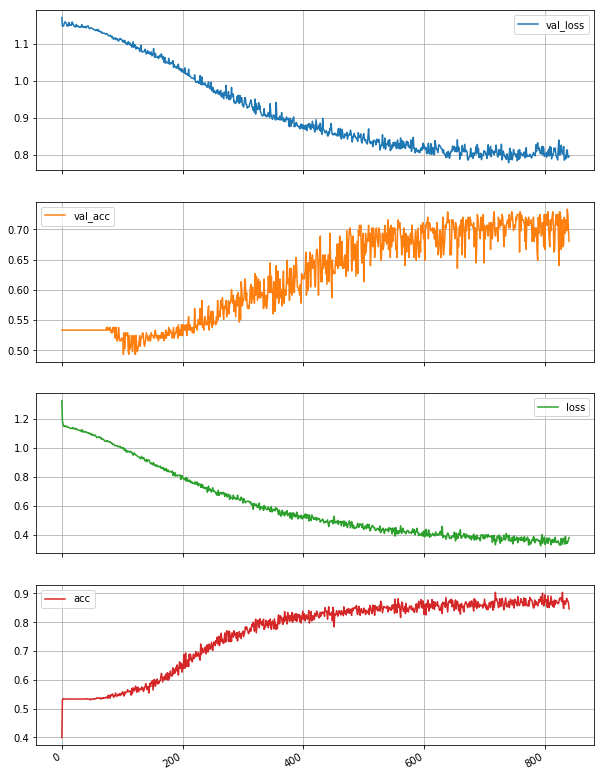

In [82]:
%matplotlib inline

# The history attribute from history object is a record of training loss values and metrics values at 
# successive epochs, as well as validation loss values and validation metrics values. It can be used to plot graphs
# which let us understand how good the training was performed over the epochs.

df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [83]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [84]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "amlangup")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50288686")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 32  Correct :68
Testing Accuracy: 68.0
